# Case Study 8 - XGBoost, Random Forest and SVM

Allen Ansari, Chris Ballenger, Shantanu Godbole, Chad Madding

DS 7333 Quantifying the World

June 29, 2020

## Table of Contents
1. [Abstract & Introduction](#Abstract)
2. [Data](#Data)
3. [EDA and Feature Reduction](#EDA)
4. [Evaluate the Response Variable](#Evaluate-the-Response)
5. [Question 1](#Question-1)
  - [Hyper Tuning Models](#Hyper-Tuning-Models)
  - [Training Testing Technique](#Training-Testing-Technique)
  - [XGBOOST](#XGBoost)
  - [Random Forest](#Random-Forest)
  - [More Parameter Tuning on RF](#Random-Forest-More-Tuning)
  - [SVM](#Support-Vector-Machine)
6. [Question 2](#Question-2)
7. [Question 3](#Question-3)
8. [Conclusion](#Conclusion)
9. [Appendix](#Appendix)

___

## Abstract  
During this project, we look to improve accuracy by exploring hypter tunning an XGBoost, a Random Forest, and a Support Vector Machine model.  The data used is provided through a kaggle competition and has already been "cleaned" for our project consumption. We found that SVM performed the best but took the longest to hyper tune, 8 hours.

### Introduction

As a global specialist in personal insurance, BNP Paribas Cardif serves 90 million clients in 36 countries across Europe, Asia and Latin America.

In a world shaped by the emergence of new uses and lifestyles, everything is going faster and faster. When facing unexpected events, customers expect their insurer to support them as soon as possible. However, claims management may require different levels of check before a claim can be approved and a payment can be made. With the new practices and behaviors generated by the digital economy, this process needs adaptation thanks to data science to meet the new needs and expectations of customers.
<sup><sub>https://www.kaggle.com/c/bnp-paribas-cardif-claims-management</sub></sup>

In order to achieve the highest accuracy we will explore hypertuning our models in order to find the optimal parameter that balances accuracy, log loss, and time.  While accuracy is important, we need to balance how much time this takes as a measurment in order to react faster to the change climax of insurance policies.

Our report will be broken is 3 sections, modeling, measurment, and time.
*Case Study Questions
* [Build and tune](#Hyper-Tuning-Models) three machine learning models: An XGBoost, a Random Forest, and an SVM to predict a given target.  
* [Show](#Results) the log loss and accuracy for XGBoost and Random Forest models on out of fold predictions. Show the Accuracy of the SVM on a validation set.
* [Time](#Support-Vector-Machine-Scale) how long it takes to do a sample of 1000, 2000, 5000, and 10,000 rows in the SVM and report the rough scaling of SVM with the sample sizes.  




[Back to Top](#Table-of-Contents)
____

## Data

Our team has been given an anonymized dataset containing both categorical and numeric variables available form the following site:  

https://smu.box.com/s/bizpcq4a3dtid04tke1x7nz7359r79y5  


The original size of the data set is 114321 rows and 133 columns.
There is no missing data, no metadata, no ordinal variables or a data dictionary.  
The "target" column in the set is the variable to predict. It is equal to 1 for claims suitable for an accelerated approval.
<sup><sub>https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/data</sub></sup>



In [17]:
import pandas as pd

case_8 = pd.read_csv("~/Dropbox/Case_Study_8/case_8.csv")

print("Data Size", case_8.shape)
print("Drop ID and Target")

## For plotting 
lables = case_8.target

y = case_8.target.values

case_8.drop(["ID","target"], axis=1, inplace=True)
print("Data Size", case_8.shape)

case_8.head()

Data Size (114321, 133)
Drop ID and Target
Data Size (114321, 131)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,1.630686,7.464411,C,4.145098,9.191265,2.436402,2.483921,2.301630,9.031859,1.312910,...,6.822439,3.549938,0.598896,AF,1.672658,3.239542,1.957825,0,1.925763,1.739389
2,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,1.630686,7.464411,C,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,1.050328,...,6.822439,3.549938,0.919812,Z,1.672658,3.239542,2.030373,0,1.925763,1.739389


[Back to Top](#Table-of-Contents)
____


## EDA

Throug our analysis, we found 19 Categorical Variables and 112 continouse variables.  Further details of our categorical variables shows column `v22` has 18,210 unique values.  Additional research has shown this to be a username field.  We decided to remove this field for its large unique fields.

In [18]:
cols = case_8.dtypes
print("Total Catagorical Variables", sum(cols == "object"))
print("Total Catagorical Variables", sum(cols != "object"))

columns = case_8.loc[:,cols == "object"].columns

print("Unique Values per catogorical column")
display( case_8[columns].apply(lambda x: len(x.value_counts())) )

print("Drop v22")
case_8_data_prep = case_8.drop(["v22"], axis=1)
columns = columns[columns != "v22"]
print("Data Size", case_8_data_prep.shape)

Total Catagorical Variables 19
Total Catagorical Variables 112
Unique Values per catogorical column


v3          3
v22     18210
v24         5
v30         7
v31         3
v47        10
v52        12
v56       122
v66         3
v71         9
v74         3
v75         4
v79        18
v91         7
v107        7
v110        3
v112       22
v113       36
v125       90
dtype: int64

Drop v22
Data Size (114321, 130)


In order to do our modeling, we need to One Hot Encode each of our categorical variables.  We have created 364 new columns from One-Hot Encoding technique, combined with the continouse gives us a 476 columns.

In [19]:
from tqdm import tqdm

data = [ pd.get_dummies(case_8_data_prep[col], prefix=col).copy() for col in tqdm(columns) ]
one_hot_df = pd.concat(data, axis=1)

display("New Columns derived from categorical", one_hot_df.shape)

100%|██████████| 18/18 [00:00<00:00, 78.53it/s]


'New Columns derived from categorical'

(114321, 364)

In [20]:
#Drop old columns
case_8_final = case_8_data_prep.drop(columns, axis=1)

#Concat Original and One-Hot Data Frame
case_8_final = pd.concat([case_8_final, one_hot_df], axis=1)
case_8_data_prep = None #take out of memory

print(case_8_final.shape)
display(case_8_final.head())

(114321, 476)


,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v125_Q,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,0,0,0,0,0,0,0,0,0,0
1,1.630686,7.464411,4.145098,9.191265,2.436402,2.483921,2.301630,9.031859,1.312910,15.447413,...,0,0,0,0,0,0,0,0,0,0
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,0,0,0,0,0,0,0,0,0,0
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,0,0,0,0,0,0,0,0,0,0
4,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,1.050328,15.447413,...,0,0,0,0,0,0,0,0,0,1


### Feature Reduction

In order to improve time for training, we first reduced highly correlated values.  In other words, columns that almost mimic each other and provide no additional value.  The function we will use is called `reduce_features` and can be found in the [Appendix](#Appendix).  The function is designed to evaluate pairwise correlation and remove one of the columns if the Pearson Correlation is greater than 0.95.

In [21]:
%%time

import pickle
import os

case_8_reduced_feats = reduce_features(case_8_final, True)

There are  46  field correlations > 95%.


,Field1,Field2,Correlation
0,v46,v8,0.975192
1,v63,v8,0.975974
2,v53,v11,0.955757
3,v64,v17,0.982626
4,v76,v17,0.992671
5,v46,v25,0.982215
6,v54,v25,0.967925
7,v63,v25,0.981040
8,v89,v25,0.964606
9,v105,v25,0.962163


Dropping the following  38  highly correlated fields.

*********Before: Dropping Highly Correlated Fields*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 476 entries, v1 to v125_Z
dtypes: float64(108), int64(4), uint8(364)
memory usage: 137.4 MB


None


*********After: Dropping Highly Correlated Fields**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 438 entries, v1 to v125_Z
dtypes: float64(88), int64(4), uint8(346)
memory usage: 118.0 MB
CPU times: user 31.7 s, sys: 177 ms, total: 31.9 s
Wall time: 31.9 s


The remaining modeling will referenced a pickle file created based on the above data process.

In [ ]:
with open(os.path.join("data","case_8_final_feats.pkl"),"wb") as f:
    pickle.dump((y, case_8_reduced_feats), f)

In [1]:
import pickle, os

with open(os.path.join("data","case_8_final_feats.pkl"),"rb") as f:
    y, case_8_reduced_feats = pickle.load(f)

____
[Back to Top](#Table-of-Contents)

## Evaluate-the-Response 

Accproximately 76% of claims are suitable for accelrated approval.  While we would like to see a more balanced dataset, this value is not extreme. We will proceed implementing stratification, for all the test - train - validation splits to make sure the imbalenced frequency distribution is maintained

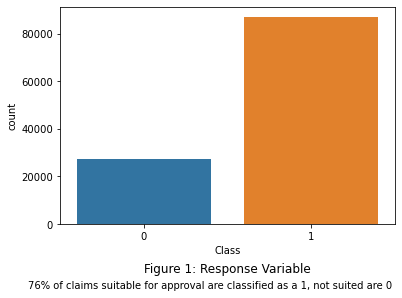

In [38]:
import matplotlib.pyplot as plt
plt.title('Figure 1: Response Variable', y=-0.25)
plt.figtext(x=0.05, y=-0.1, s = "76% of claims suitable for approval are classified as a 1, not suited are 0")
plt.xlabel('Class')
plt.ylabel('Frequency')
ax = sns.countplot(x=y)

[Back to Top](#Table-of-Contents)
____

## Question-1 
#### Build 3 tuned models: An XGBoost, a Random Forest, and an SVM.

###  Hyper-Tuning-Models  

To predict the category of a claim based on features available early in the process we will build 3 tuned models; XGBoost, Random Forest and SVM. We will show the log loss and accuracy for XGBoost, and Random Forest models on out of fold predictions, show the Accuracy of the SVM on a validation set and finaly we will time how long it takes to do a sample of 1000, 2000, 5000, and 10,000 rows in the SVM.  With the data collected during this project we will also be able to provide a rough scaling of SVM with sample sizes.

We will create the train and test set for cross-validation of the results using the train_test_split function from sklearn's model_selection module with test_size size equal to 30% of the data. Also, to maintain the reproducibility of the results, a random_state of 123 will be assigned.

In so doing we will be helping BNP Paribas Cardif accelerate its claims process and therefore provide a better service to its customers.      

*The code used throughout the project is original to this team and modified versions of samples provided during class.*


### Training-Testing-Technique

In order to perform a fair test between all models, we opted to sample 70% of the data, through a strattified random sample. We will also do a CV K-Fold of 3 in order to minimize the amount of time some of these models takes to run.

In [11]:
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
import os

X = case_8_reduced_feats.values
    
X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        stratify=y, 
        test_size=0.30,
        random_state=123
    )

___
[Back to Top](#Table-of-Contents)

### XGBoost

The following parameters were selected for tuning our XGBoost model.  The definitions were provided from https://xgboost.readthedocs.io/en/latest/parameter.html. All the tuning parameters are focused on the boosting aspect of the model.

**Hyper-Tuning Parameters**
* eta (default=0.3, alias: learning_rate, range: [0,1])
    * Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
* gamma (default=0, alias: min_split_loss, range: [0,∞])
    * Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
* max_depth (default=6, range: [0,∞] (0 is only accepted in lossguided growing policy when tree_method is set as hist))
    * Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 is only accepted in lossguided growing policy when tree_method is set as hist and it indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree.
* min_child_weight (default=1, range: [0,∞])
    * Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be.

**Additional Parameters (Not hyper tuned)**
* objective (default=reg:squarederror)
    * Our model is a Binary classification, thus we will use `binary:logistic`
* metrics
    * We will measure basedo on `logloss` and `auc` (Area Under Curve)
* num_boost_round (defualt=10)
    * We will use 30 rounds
* early_stopping_rounds (default=None)
    * With the large number of boosting rounds, we will stop our model after 3 rounds of no change

In [35]:
import itertools
import numpy as np
import xgboost as xgb

xgtrain = xgb.DMatrix(X_train, y_train)
xgtest = xgb.DMatrix(X_test, y_test)

gamma =  list(np.arange(20, 10, -2))
max_depth = list(np.arange(2, 12, 3))
eta = list(np.arange(0.01, 1, 0.4))
min_child_weight = list(np.arange(0.01, 1, 0.4))
objective="binary:logistic"


parameters = [{"gamma": param[0], "max_depth": param[1], "eta": param[2],"min_child_weight":param[3], "objective": objective}
                  for param in itertools.product(gamma, max_depth, eta, min_child_weight)]

print("Total parameter values to train", len(parameters))

Total parameter values to train 180


The model can be found in the [Appendix](#Appendix).

<img src="XGBoost-time.png" alt="Drawing" align="left" style="width: 500px;"/>

<!-- ![image info](XGBoost-time.png) -->

**Top 5 Parameters**

*Values are sorted by `test-logloss-mean`*

In [39]:
import pandas as pd
xgboost_results = pd.read_csv("data/XGBOOST_Tunning.csv")

In [7]:
xgboost_results.sort_values(by=["test-logloss-mean"], ascending=True).head()

,gamma,max_depth,eta,min_child_weight,objective,rounds,train-logloss-mean,train-logloss-std,train-auc-mean,train-auc-std,test-logloss-mean,test-logloss-std,test-auc-mean,test-auc-std
156,12,5,0.41,0.01,binary:logistic,13,0.459897,0.001421,0.766568,0.002063,0.470241,0.002572,0.749903,0.003772
158,12,5,0.41,0.81,binary:logistic,13,0.459897,0.001421,0.766568,0.002063,0.470241,0.002572,0.749903,0.003772
157,12,5,0.41,0.41,binary:logistic,13,0.459897,0.001421,0.766568,0.002063,0.470241,0.002572,0.749903,0.003772
120,14,5,0.41,0.01,binary:logistic,15,0.461842,0.001736,0.763550,0.002530,0.470538,0.002589,0.749045,0.003733
121,14,5,0.41,0.41,binary:logistic,15,0.461842,0.001736,0.763550,0.002530,0.470538,0.002589,0.749045,0.003733


Parameters `gamma`, `max_depth`, and `eta` of 12, 5, and 0.41 respecitvely dominated the as the parameters.  The addition of `min_child_weight` provided no additional value to our best performing model.

**Bottom 5 Parameters**

In [8]:
xgboost_results.sort_values(by=["test-logloss-mean"], ascending=True).tail()

,gamma,max_depth,eta,min_child_weight,objective,rounds,train-logloss-mean,train-logloss-std,train-auc-mean,train-auc-std,test-logloss-mean,test-logloss-std,test-auc-mean,test-auc-std
37,18,2,0.01,0.41,binary:logistic,30,0.616315,0.000222,0.704905,0.001457,0.616484,0.000205,0.702511,0.004011
38,18,2,0.01,0.81,binary:logistic,30,0.616315,0.000222,0.704905,0.001457,0.616484,0.000205,0.702511,0.004011
45,18,5,0.01,0.01,binary:logistic,26,0.615991,0.000487,0.740826,0.001904,0.616562,0.000307,0.735725,0.003046
46,18,5,0.01,0.41,binary:logistic,26,0.615991,0.000487,0.740826,0.001904,0.616562,0.000307,0.735725,0.003046
47,18,5,0.01,0.81,binary:logistic,26,0.615991,0.000487,0.740826,0.001904,0.616562,0.000307,0.735725,0.003046


Further analysis shows decreasing the `eta` had the largest impact to our model's performance.  Below plot shows the average log-loss for each parameter of eta.

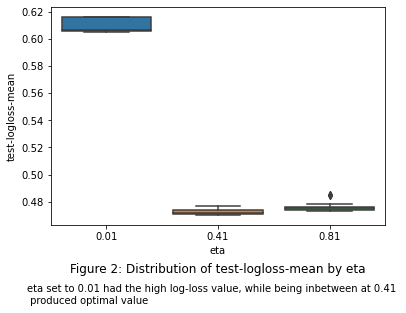

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Figure 2: Distribution of test-logloss-mean by eta', y=-0.25)
plt.figtext(x=0.07, y=-0.15, s = "eta set to 0.01 had the high log-loss value, while being inbetween at 0.41 \n produced optimal value")
ax = sns.boxplot(x="eta", y="test-logloss-mean", data=xgboost_results)

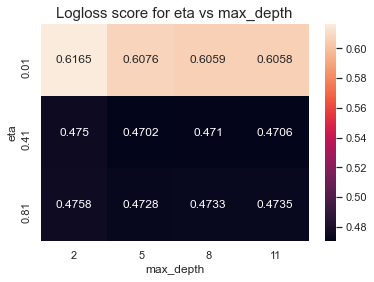

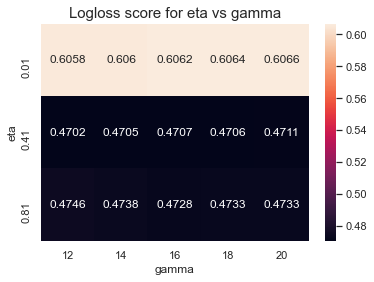

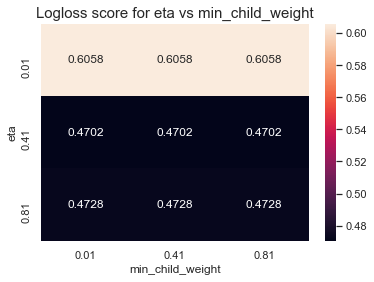

In [157]:
heatmapplot(xgboost_results,'eta','max_depth', 'test-logloss-mean')
heatmapplot(xgboost_results,'eta','gamma', 'test-logloss-mean')
heatmapplot(xgboost_results,'eta','min_child_weight', 'test-logloss-mean')

**Figure 3 Heat of parameter combinations**<br>
*Each Heatmap provides min log-loss mean per paramater combination.*

Figure 3 shows that `eta` for value 0.01 with any combinate of the other parameters did improve its score.  In figure 4 we also show that number of rounds are significant and did not produce optimal results.

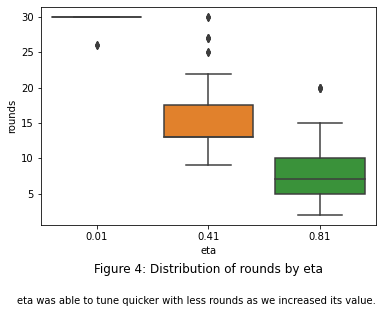

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Figure 4: Distribution of rounds by eta', y=-0.25)
plt.figtext(x=0.07, y=-0.15, s = "eta was able to tune quicker with less rounds as we increased its value.")

ax = sns.boxplot(x="eta", y="rounds", data=xgboost_results)

[Back to Top](#Table-of-Contents)
___


### Random-Forest

The follow parameters we selected was a focused on the tree and leaf features.  The definition of the parameters can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

**Hyper-Tuning Parameters**
* max_features ({“auto”, “sqrt”, “log2”}, int or float, default=”auto”)
    * The number of features to consider when looking for the best split:
* n_estimators (int, default=100)
    * The number of trees in the forest.
* min_samples_leaf (int or float, default=1)
    * The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
    
*Implementation of RF took 11 minutes, you can find the full code in our Appendix*

```
param_grid = {
    "max_features" : ["auto","log2",0.20, 0.30],
    "n_estimators" : [10,50,100],
    "min_samples_leaf" : [25, 50, 100]
}
```
<img src="Random-Forest-time.png" alt="Drawing" align="left" style="width: 700px;"/>

<!-- ![image info](Random-Forest-time.png) -->

In [85]:
# Load from file
with open("Random Forest/CV_Random_Forest.pkl", 'rb') as file:
    CV_rf = pickle.load(file)

In [86]:
rf_gridsearch = pd.DataFrame(CV_rf.cv_results_)
rf_columns = [
    "param_max_features",
    "param_n_estimators",
    "param_min_samples_leaf",
    "mean_fit_time",
    "mean_test_score",
    "rank_test_score"
]

**Top 10 parameters**

In [294]:
rf_gridsearch[rf_columns].sort_values(by="rank_test_score").head(10)

,param_max_features,param_n_estimators,param_min_samples_leaf,mean_fit_time,mean_test_score,rank_test_score
29,0.3,100,25,269.220127,0.782540,1
28,0.3,50,25,130.805423,0.782190,2
20,0.2,100,25,193.493421,0.781878,3
19,0.2,50,25,95.615099,0.781790,4
32,0.3,100,50,213.482754,0.781616,5
35,0.3,100,100,147.757219,0.781553,6
31,0.3,50,50,118.879127,0.781503,7
23,0.2,100,50,174.869673,0.781503,8
22,0.2,50,50,85.996052,0.781353,9
34,0.3,50,100,109.243511,0.781103,10


Defining the parameter of `max_features` to either 0.2 or 0.3 produced the best result.  From the below boxplot, the parameters for adjust `min_samples_leaf` produced a more consitent result and high mean score.

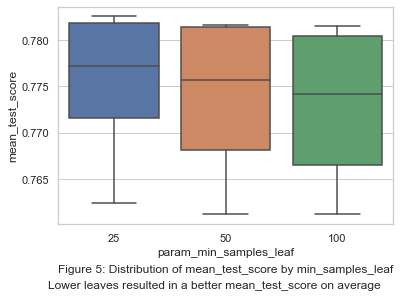

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Figure 5: Distribution of mean_test_score by min_samples_leaf', y=-0.25)
plt.figtext(x=0.1, y=-0.1, s = "Lower leaves resulted in a better mean_test_score on average")
ax = sns.boxplot(x="param_min_samples_leaf", y="mean_test_score", data=rf_gridsearch)

**Bottom 5 Parameters**

In [183]:
rf_gridsearch[rf_columns].sort_values(by="rank_test_score").tail()

,param_max_features,param_n_estimators,param_min_samples_leaf,mean_fit_time,mean_test_score,rank_test_score
15,log2,10,100,2.961179,0.761272,32
13,log2,50,50,14.913858,0.761272,32
14,log2,100,50,29.080341,0.761259,34
16,log2,50,100,13.366173,0.761197,35
17,log2,100,100,24.853025,0.761197,35


The parameter `max_features` set to log2 produced the worst scores, but tuning time was significantly faster.  Evaluating the box-plot below we can see log2 was the fastest to tune.

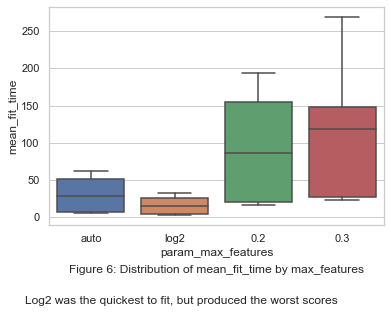

In [95]:
import seaborn as sns
sns.set(style="whitegrid")

plt.title('Figure 6: Distribution of mean_fit_time by max_features', y=-0.25)
plt.figtext(x=0.07, y=-0.15, s = "Log2 was the quickest to fit, but produced the worst scores")
ax = sns.boxplot(x="param_max_features", y="mean_fit_time", data=rf_gridsearch)

### Random-Forest-More-Tuning

We wanted to check if the accuracy can be further increased by tuning more parameters, therefore we did another attempt to adjust some other parameters in Random forest that we did not, earlier. The model and the parameters can be found in the appendix. 

One thing that we are specifically interested in is to see how Gini and Entropy change accuracy with changing Max Depth of the Trees in Random Forest 

*For our model comparsion, we elected to compare the first random forest model to XGBoost and SVM.*

```
param_grid = { 
    'n_estimators': [12,15,20,25],
    'max_features': ['auto','sqrt'],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' :[1,2,3,4]
}
```

In [3]:
# Load from file
import pandas as pd
with open("Data/CV_Random_Forest_more_parameters.pkl", 'rb') as file:
    CV_rf2 = pickle.load(file)

rf_columns = [
    "param_max_features",
    "param_n_estimators",
    "param_min_samples_leaf",
    "param_criterion",
    "mean_fit_time",
    "mean_test_accuracy",
    "rank_test_accuracy"
]  
    
rf_gridsearch_2 = pd.DataFrame(CV_rf2.cv_results_)

In [77]:
rf_gridsearch_2[rf_columns].sort_values(['rank_test_accuracy']).head(10)

,param_max_features,param_n_estimators,param_min_samples_leaf,param_criterion,mean_fit_time,mean_test_accuracy,rank_test_accuracy
2559,sqrt,25,4,entropy,18.508894,0.761197,1
3158,sqrt,20,2,gini,14.087506,0.761197,1
3159,sqrt,25,2,gini,17.636999,0.761197,1
3160,sqrt,12,2,gini,8.531075,0.761197,1
3161,sqrt,15,2,gini,10.656822,0.761197,1
3162,sqrt,20,2,gini,14.465890,0.761197,1
3163,sqrt,25,2,gini,17.927299,0.761197,1
3164,sqrt,12,2,gini,8.526420,0.761197,1
3165,sqrt,15,2,gini,10.837747,0.761197,1
3166,sqrt,20,2,gini,14.533862,0.761197,1


In [7]:
plotGiniEntropy()

*In the above plot, we compare the accuracy of the model on using Gini vs Entropy over the max depth of trees that were allowed to be created in the Grid Search CV itirations.*<br>

Both gini and entropy are measures of impurity of a node. A node having multiple classes is impure whereas a node having only one class is pure. Entropy tells how random of uncertain the dataset is. Also, gini on the similar lines measures the inequality.  
 
Both the meserments are mathematically represented as folloes: 

<img src="https://thatascience.com/wp-content/uploads/2018/10/ginientropy.jpg" alt="Drawing" style="width: 300px;"/>

As we can see in the above plot, the accuracy of the model is <b>Exactly Similar</b> considering both the indices.

[Back to Top](#Table-of-Contents)
___

### Support-Vector-Machine

Scikit Learn has several implementations of Support Vector Machine (SVM).  SVM benefit is that it tries to move values in to a higher dimension (i.e. X^2) in order to classify models.  For the purpose of our exersize, we will use the SKLearn's `LinearSVC` implementation.  This is similar to the SVM algorithm, but uses a linear kernal.  The change allows more flexibility on penalty and loss function, thus allows us a scale better.

Our implementation of SVM uses the `StandardScaler` which will scale our values between -1 and 1.  We chose this in order to allow SVM to consistently measure distance ebtween values.

**Hyper-Tuning Parameters**
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
* C (float, default=1.0)
    * Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
* loss ({‘hinge’, ‘squared_hinge’}, default=’squared_hinge’)
    * Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.
* dual (bool, default=True)
    * Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.
* tol (float, default=1e-4)
    * Tolerance for stopping criteria.
* max_iter (int, default=1000)
    * The maximum number of iterations to be run.
    
**Additional Parameters (Not hyper tuned)**
* penalty ({‘l1’, ‘l2’}, default=’l2’)
    * Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.
    
*Implementation of SVM took over 500 minutes, you can find the full code in our [Appendix](#Appendix)*

```
param_grid = {
    'C': [0.001,0.01,0.1],
    'loss': ['hinge', 'squared_hinge'],
    'penalty' : ['l2'],
    'dual' : [True,False],
    'tol': [0.00001,0.0001,0.001,0.01,0.1,1],
    'max_iter': [1500,2000,3000,4000,5000,6000],
}
```

<!-- ![image info](SVM-GridSearch-Time.png) -->
<img src="SVM-GridSearch-Time.png" alt="Drawing" align="left" style="width: 700px;"/>



In [8]:
# Load from file
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

with open("Linear SVM/CV_SVM_Linear.pkl", 'rb') as file:
    CV_svc = pickle.load(file)

In [9]:
svc_gridsearch = pd.DataFrame(CV_svc.cv_results_)
svc_columns = [
    "param_C",
    "param_loss",
    "param_dual",
    "param_tol",
    "param_max_iter",
    "mean_fit_time",
    "mean_test_score",
    "rank_test_score"
]

**Top 10 parameters**

*Sorted by `rank_test_score`*

In [51]:
svc_gridsearch[svc_columns].sort_values(by="rank_test_score").head(10)

,param_C,param_loss,param_dual,param_tol,param_max_iter,mean_fit_time,mean_test_score,rank_test_score
285,0.01,squared_hinge,False,0.01,6000,55.294699,0.771519,1
279,0.01,squared_hinge,False,0.01,5000,55.967064,0.771519,1
255,0.01,squared_hinge,False,0.01,1500,55.301194,0.771519,1
273,0.01,squared_hinge,False,0.01,4000,55.119091,0.771519,1
261,0.01,squared_hinge,False,0.01,2000,55.340740,0.771519,1
267,0.01,squared_hinge,False,0.01,3000,55.176255,0.771519,1
254,0.01,squared_hinge,False,0.001,1500,94.941308,0.771519,7
260,0.01,squared_hinge,False,0.001,2000,97.312570,0.771519,7
266,0.01,squared_hinge,False,0.001,3000,96.838349,0.771519,7
284,0.01,squared_hinge,False,0.001,6000,97.503199,0.771519,7


We opted to show the top 10 values to provide some insight how parameter tuning can drastically increase in time, but provide no additional value.  In the above table, we can see the first 10 scored the same, but a deeper analysis shows that decreasing `tol` form 0.021 to 0.001 increased time to train from ~55 seconds to ~97 seconds.  Below is a box plot of average time for each `tol` parameter.  The behaivor makes sense as it it the parameter to stop training the model.

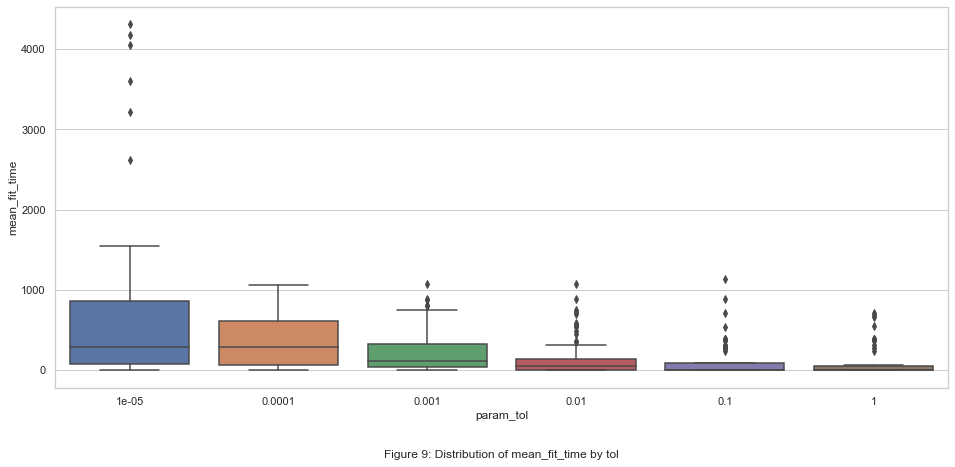

In [110]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 7))
plt.title('Figure 9: Distribution of mean_fit_time by tol', y=-0.2)
ax = sns.boxplot(x="param_tol", y="mean_fit_time", data=svc_gridsearch)

*Parameter of tol increases, results in a decrease in time to fit a model*

**Bottom 10 parameters**

Reviewing the results, we found 108 models that did not return a `mean_test_score`.

In [111]:
svc_gridsearch[svc_columns].sort_values(by="rank_test_score").tail(10)

,param_C,param_loss,param_dual,param_tol,param_max_iter,mean_fit_time,mean_test_score,rank_test_score
76,0.001,hinge,False,0.1,1500,0.568480,NaN,423
77,0.001,hinge,False,1,1500,0.567813,NaN,424
78,0.001,hinge,False,1e-05,2000,0.520276,NaN,425
79,0.001,hinge,False,0.0001,2000,0.530914,NaN,426
80,0.001,hinge,False,0.001,2000,0.530581,NaN,427
81,0.001,hinge,False,0.01,2000,0.557176,NaN,428
82,0.001,hinge,False,0.1,2000,0.532908,NaN,429
83,0.001,hinge,False,1,2000,0.573466,NaN,430
86,0.001,hinge,False,0.001,3000,0.595407,NaN,431
85,0.001,hinge,False,0.0001,3000,0.558506,NaN,432


Parameters `C`, `loss`, and `dual` with values of 0.001, hinge, and False respectively, all failed to return a test score.  In order to learn what parameters are poorly performance, we analye using the below heatmap.

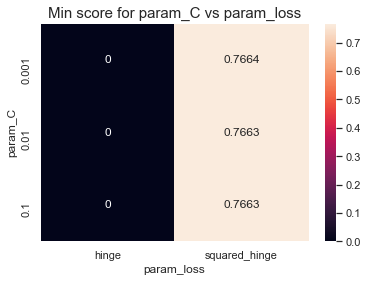

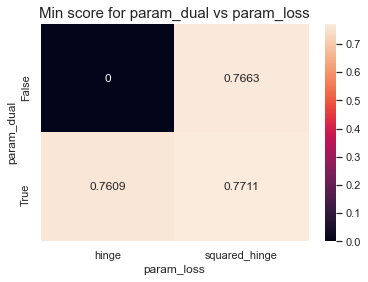

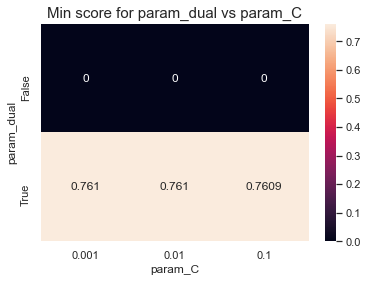

In [116]:
svc_gridsearch.loc[svc_gridsearch.mean_test_score.isna(),"mean_test_score"] = 0
heatmapplot(svc_gridsearch,'param_C','param_loss', 'mean_test_score')
heatmapplot(svc_gridsearch,'param_dual','param_loss', 'mean_test_score')
heatmapplot(svc_gridsearch,'param_dual','param_C', 'mean_test_score')

**Figure 10; Heatmap of mean_test_score parameter combinations**<br>
*The different combinates shows the results of some of our model tuning result in a NA (0) score*

Further evalutaion of the issue suggested that "The combination of penalty='l2' and loss='hinge' are not supported when dual=False" by the model.  Therefore, below is the bottom scores, excluding zeros.

In [117]:
display( svc_gridsearch.loc[svc_gridsearch.mean_test_score > 0, svc_columns].sort_values(by="rank_test_score").tail(5))
print("The range for mean_test_score", \
      svc_gridsearch.mean_test_score.max() - svc_gridsearch.mean_test_score.min())

,param_C,param_loss,param_dual,param_tol,param_max_iter,mean_fit_time,mean_test_score,rank_test_score
298,0.1,hinge,True,0.1,2000,311.207234,0.760934,319
296,0.1,hinge,True,0.001,2000,315.751934,0.760934,319
295,0.1,hinge,True,0.0001,2000,316.313779,0.760934,319
294,0.1,hinge,True,1e-05,2000,320.693177,0.760934,319
297,0.1,hinge,True,0.01,2000,314.898139,0.760934,319


The range for mean_test_score 0.7715185606057678


In [10]:
plotHingeSquare()

*Above graphs shows, the score stayed constant over both the types of losses. The number of iterations did not matter. Square-hinge loss consistently have slightly better accuracy over hinge loss*

In [11]:
import plotly.express as px

fig = px.scatter(svc_gridsearch.loc[svc_gridsearch.mean_test_score > 0,:], x="mean_test_score", y="mean_fit_time")

fig.update_layout(xaxis_title="Test Score",
    yaxis_title="Time required to fit",
    title={'text': "Figure 12: SVM - Linear Test Score VS Time",'y':0.05,'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()

*The range for the test score is minimal from the worst model to the best, with some of the poorest performance taking the longest to run. If you plot time vs. score we can see that we can get optimal performance without sacrificing time.*

[Back to Top](#Table-of-Contents)
___

## Question-2

##### Show the log loss and accuracy for XGBoost, and Random Forest models on out of fold predictions.  Show the Accuracy of the SVM on a validation set

### Results

We use a a "out of fold predictions" technique to calculate log-loss and accuracy for our 3 models.  A strattified k-fold will be performed over 5 iterations.  For each hold out in the fold we will predict its value.

Below code shows the the optimal paremters we have selected for our model.

In [133]:
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

X = case_8_reduced_feats.values

# SVM Prep
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf_clf_param = CV_rf.best_params_
print("Random Forest",rf_clf_param)

svm_clf_param = CV_svc.best_params_
print("SVM",svm_clf_param)
xgb_best_param = xgboost_results.sort_values(by=["test-logloss-mean"], ascending=True).head(1).reset_index() \
    .T.loc[["gamma","max_depth","eta","min_child_weight","objective"],:].to_dict()[0]
print("XGB", xgb_best_param)

Random Forest {'max_features': 0.3, 'min_samples_leaf': 25, 'n_estimators': 100}
SVM {'C': 0.01, 'dual': False, 'loss': 'squared_hinge', 'max_iter': 1500, 'penalty': 'l2', 'tol': 0.01}
XGB {'gamma': 12, 'max_depth': 5, 'eta': 0.41, 'min_child_weight': 0.01, 'objective': 'binary:logistic'}


**Stratified K-Fold**

The below plot shows how each fold each pull its hold-out values.

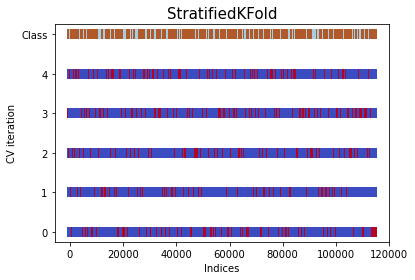

In [12]:
from sklearn.model_selection import StratifiedKFold

num_cv_iterations = 5
random_st = 42
kfold_cv = StratifiedKFold(
    n_splits=num_cv_iterations,
    shuffle=True,
    random_state = 123
)

fig, ax = plt.subplots()
cv_plot(ax, kfold_cv, X, y)

**Figure 13 StratifiedKFold**<br>
*Red indicates the holdout for each k-fold, indication random select each time*

Our trained model can be found n the [Appendix](#Appendix).

```
from sklearn.ensemble import RandomForestClassifier

rf_y_hat = np.zeros(len(y))
rf_y_hat_score = np.zeros(len(y))

for train, test in tqdm(kfold_cv.split(X,y), total=5):
    rf_clf = RandomForestClassifier(
        max_features=rf_clf_param["max_features"], 
        min_samples_leaf=rf_clf_param["min_samples_leaf"],
        n_estimators=rf_clf_param["n_estimators"],
        random_state=42, 
        n_jobs=-2)
    rf_clf.fit(X[train],y[train])
    rf_y_hat[test] = rf_clf.predict(X[test])
    rf_y_hat_score[test] = rf_clf.predict_proba(X[test])[:,1]
    
    svm_clf = LinearSVC(
    random_state=42,
    C = svm_clf_param["C"],
    dual = svm_clf_param["dual"],
    loss = svm_clf_param["loss"],
    max_iter = svm_clf_param["max_iter"],
    penalty = svm_clf_param["penalty"],
    tol = svm_clf_param["tol"]
    
    xgtrain = xgb.DMatrix(X[train], y[train])
    xgtest = xgb.DMatrix(X[test], y[test])

    bst = xgb.train(xgb_best_param, xgtrain)
    xgb_y_hat[test] = (bst.predict(xgtest) > .5)*1
    xgb_y_hat_score[test] = bst.predict(xgtest)
```

### Final Results

In [162]:
from sklearn.metrics import accuracy_score, log_loss

rf_y_hat, rf_y_hat_score = pickle.load(open("data/rf_y_hat.pkl","rb"))
svm_y_hat = pickle.load(open("data/svm_y_hat.pkl","rb"))
xgb_y_hat, xgb_y_hat_score = pickle.load(open("data/xgb_y_hat.pkl","rb"))

metric = [
    {
        "metric":"Accuracy",
        "XGBoost": accuracy_score(y, xgb_y_hat),
        "Random Forest": accuracy_score(y, rf_y_hat),
        "Support Vector Machine": accuracy_score(y, svm_y_hat)    
    },
    {
        "metric":"Log Loss",
        "XGBoost": log_loss(y, xgb_y_hat_score),
        "Random Forest": log_loss(y, rf_y_hat_score),
        "Support Vector Machine": None    
    }
]

pd.DataFrame(metric)

,metric,XGBoost,Random Forest,Support Vector Machine
0,Accuracy,0.781003,0.781799,0.807944
1,Log Loss,0.472091,0.467973,NaN


In our final model, we have found that SVM performed the best with an accuracy of 0.80. Tuning this model to get the optimal score took 8 hours and there should be a balance to determine what is the best model.  Reviewing log loss, we found the Random Forest model performed slightly better.

[Back to Top](#Table-of-Contents)
___

## Question-3
### Support Vector Machine Scaleing

In [17]:
%%capture

#### Data Read 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_data = pd.read_csv ("data/case_8.csv")
df_data.drop('v22',axis=1,inplace=True)
from tqdm import tqdm
cols = df_data.dtypes
columns = df_data.loc[:,cols == "object"].columns
data = [ pd.get_dummies(df_data[col], prefix=col).copy() for col in tqdm(columns) ]
one_hot_df = pd.concat(data, axis=1)

#Drop old columns

df_data_nc = df_data.drop(columns, axis=1)
df_data_final = pd.concat([df_data_nc, one_hot_df], axis=1)
df_data_encoded = reduce_features(df_data_final, True)

In [18]:
%%capture

from sklearn.model_selection import cross_validate
SVC_Linear_tuned = LinearSVC(random_state=42,max_iter=7000,C=0.01,loss='squared_hinge',penalty='l2',dual=False,tol=0.01)

training_time = []
import time
training_sizes = [1000,2000,5000,10000,20000,30000,40000]
for training_size in training_sizes:
    df_data_encoded_train = df_data_encoded.sample(training_size)
    print(len(df_data_encoded_train))
    
    labels_train = df_data_encoded_train.target
    df_data_encoded_X_train = df_data_encoded_train.drop(["ID","target"],axis = 1)
    df_enc_scaled_train = scaler.fit_transform(df_data_encoded_X_train)
    t0 = time.time()
    
#     SVC_Linear_tuned.fit(df_enc_scaled_train,labels_train)
    
    cross_validate(SVC_Linear_tuned,df_enc_scaled_train,labels_train,cv=5)
    t1 = time.time()
    training_time.append((t1-t0))
    
with open("data/svm_training_time.pkl","wb") as f:
    pickle.dump(training_time, f)

In [19]:
import plotly.express as px

with open("data/svm_training_time.pkl","rb") as f:
    training_time = pickle.load(f)

fig = px.bar(x=training_sizes, y=training_time,range_y = [0,29])

fig.update_layout(xaxis_type='category',
                  xaxis_title="Number of Samples",
                  yaxis_title="Training time in Seconds",
                  title={
                        'text': "Figure 14: SVM - Linear' training time in Seconds",
                        'y':0.05,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'})
fig.show()

*The results of our time increases expontially*

To check how both the parameters are related, that is for getting the regression co-efficient, we had to log both the variables for meeting the regression assumptions and for the relationship to appear linear

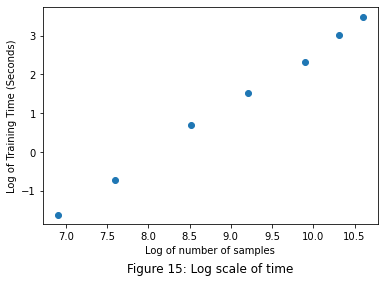

In [20]:
import matplotlib.pyplot as plt
plt.scatter(np.log(training_sizes),np.log(training_time))
plt.title("Figure 15: Log scale of time", y = -0.25)
plt.xlabel("Log of number of samples")
plt.ylabel("Log of Training Time (Seconds)")
plt.show()

*The above plot shows a linear relationship after a log scale.*

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = np.log(training_sizes).reshape(-1,1)
y = np.log(training_time).reshape(-1,1)

regressor = LinearRegression()  
regressor.fit(x, y) #training the algorithm

### Regression Co-Eff
print("Regression (x) coefficient:", regressor.coef_[0][0])

Regression (x) coefficient: 1.3560018871329058


This can be roughly interpreted as, for every 1% change in number of samples, the training time for SVM will go up by 1.35%

[Back to Top](#Table-of-Contents)
___

## Conclusion

In our report we tuned 3 models, XGBoost, Random Forest, and SVM.  Through our analysis we have found difference combinations of that performed best or performed poorly.  Through our analysis we found the Support Vector Machine performed best, if you have time for training.  SVM does not scale well though as you increased rows.  We also found that XGBoost performed the worst, in both Log-Loss and Accuracy.  We believe this is due to the low dimensions of columns to benefit from the boosting techniques XGBoost implements.  Future analysis should focus on improve the imbalanced of the data set though techniques like SMOTE.

## Appendix

* [Remove Highly Correlated Fields](#Remove-Highly-Correlated-Fields)
* [XGBoost Model](#XGBoost-Model)
* [Random Forest Model](#Random-Forest-Model)
* [Support Vector Machine Model](#Support-Vector-Machine-Model)
* [Random Forest Model More Hyperparameters Model](#Random-Forest-Model-More-Hyperparameters)
* [Final Model](#Final-Model)

In [114]:
import matplotlib.pyplot as plt

def heatmapplot(result,param1,param2, metric):
    min_scores = pd.DataFrame(result).groupby([param1, param2])[metric].min().unstack()
    sns.heatmap(min_scores, annot=True, fmt='.4g')
    
    plt.title('Min score for {} vs {}'.format(param1,param2), fontsize = 15) # title with fontsize 20
    plt.show()

#### Remove Highly Correlated Fields**

In [16]:
import numpy as np
def reduce_features(df, verbose = False):
    # calculate the correlation matrix
    corr_matrix  = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    #Get all of the correlation values > 95%
    x = np.where(upper > 0.95)

    #Display all field combinations with > 95% correlation
    cf = pd.DataFrame()
    cf['Field1'] = upper.columns[x[1]]
    cf['Field2'] = upper.index[x[0]]

    #Get the correlation values for every field combination. (There must be a more pythonic way to do this!)
    corr = [0] * len(cf)
    for i in range(0, len(cf)):
        corr[i] =  upper[cf['Field1'][i]][cf['Field2'][i]] 

    cf['Correlation'] = corr

    if( verbose ):
        print('There are ', str(len(cf['Field1'])), ' field correlations > 95%.')
        display(cf)
        
        print('Dropping the following ', str(len(to_drop)), ' highly correlated fields.')
        to_drop
        
    #Check columns before drop 
    if( verbose ):
        print('\r\n*********Before: Dropping Highly Correlated Fields*************************************')
        display(df.info(verbose=False))

    # Drop the highly correlated features from our training data 
    df = df.drop(to_drop, axis=1)

    #Check columns after drop 
    if( verbose ):
        print('\r\n*********After: Dropping Highly Correlated Fields**************************************')
        df.info(verbose=False)
    
    return df

#### XGBoost Model

In [222]:
def trainXGBoost(param):
    stopping = 3
    boost_rounds = 30
    
    model = xgb.cv(
        param,
        xgtrain,
        nfold=3,
        metrics=(["logloss",'auc']),
        stratified=True,
        seed=123,
        num_boost_round=boost_rounds,
        early_stopping_rounds=stopping
    )
#     mean_logloss = model['test-logloss-mean'].min()
#     boost_rounds = model['test-logloss-mean'].argmin()
#     mean_auc =  model['test-auc-mean'].max()
#     auc_boost_round = model['test-auc-mean'].argmax()

    return pd.concat([pd.DataFrame([param]), model.tail(1).reset_index()], axis=1)
    
#     return {
#         'gamma':param["gamma"],
#         'max_depth':param["max_depth"],
#         "eta": param["eta"],
#         "min_child_weight":param["min_child_weight"],
#         "acc":mean_auc,
#         "logloss":mean_logloss,
#         "auc_boost_round": auc_boost_round,
#         "boost_rounds": boost_rounds
#     }

```
from tqdm import tqdm
result = list(map(trainXGBoost, tqdm(parameters)))

xgboost_results = pd.concat(result, axis=0).rename(columns={"index":"rounds"})
xgboost_results["rounds"] = xgboost_results.rounds + 1
xgboost_results.to_csv("data/XGBOOST_Tunning.csv", index=False)
```

#### Random Forest Model

```
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_features" : ["auto","log2",0.20, 0.30],
    "n_estimators" : [10,50,100],
    "min_samples_leaf" : [25, 50, 100]
}

rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3,n_jobs = -2, verbose=1)
CV_rfc_mod = CV_rfc.fit(X_train, y_train)

pkl_filename = "CV_Random_Forest.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(CV_rfc, file)
```

#### Support Vector Machine Model

```
### Scale the Dataset 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import sklearn.feature_selection as fs
from sklearn.model_selection import cross_val_score
import timeit
import pickle
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import maatplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_enc_scaled = scaler.fit_transform(case_8_reduced_feats.values)

X_train, X_test, y_train, y_test = train_test_split(df_enc_scaled, y,
        stratify=labels, 
        test_size=0.30,
        random_state=123)

# Gridsearch to determine the value of C
param_grid = {'C': [0.001,0.01,0.1],
              'loss': ['hinge', 'squared_hinge'],
              'penalty' : ['l2'],
              'dual' : [True,False],
              'tol': [0.00001,0.0001,0.001,0.01,0.1,1], #0.0001 is the Default
              'max_iter': [1500,2000,3000,4000,5000,6000],
             }

SVC_Linear = LinearSVC(random_state=42)
CV_svc = GridSearchCV(estimator = SVC_Linear, param_grid=param_grid, cv= 3, n_jobs = -1,verbose=1)
CV_svc_mod = CV_rfc.fit(X_train, y_train)

pkl_filename = "CV_SVM_Linear.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(CV_svc_mod, file)
```

In [9]:
#this analysis was inspired by the cv visualization found at https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py
from sklearn.model_selection import (KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

np.random.seed(42)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def cv_plot(ax, cv, X, y):
    plt.figure
    for i, (train_index, test_index) in enumerate(cv.split(X=X, y=y)):
        indices = np.array([np.nan] * len(X))
        indices[test_index] = 1
        indices[train_index] = 0        
        ax.scatter(range(len(indices)), [i+1] * len(indices), c=indices, marker='_', lw=10, cmap=cmap_cv)
   
    ax.scatter(range(len(indices)), [i+2] * len(indices), c=y, marker='_', lw=10, cmap=cmap_data)
    ytick = list(range(num_cv_iterations)) + ['Class']
    ax.set(yticks=np.arange(num_cv_iterations+1) + 1, yticklabels=ytick, xlabel='Indices', ylabel="CV iteration")
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

In [221]:
import numpy as np
def reduce_features(df, verbose = False):
    # calculate the correlation matrix
    corr_matrix  = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    #Get all of the correlation values > 95%
    x = np.where(upper > 0.95)

    #Display all field combinations with > 95% correlation
    cf = pd.DataFrame()
    cf['Field1'] = upper.columns[x[1]]
    cf['Field2'] = upper.index[x[0]]

    #Get the correlation values for every field combination. (There must be a more pythonic way to do this!)
    corr = [0] * len(cf)
    for i in range(0, len(cf)):
        corr[i] =  upper[cf['Field1'][i]][cf['Field2'][i]] 

    cf['Correlation'] = corr

    if( verbose ):
        print('There are ', str(len(cf['Field1'])), ' field correlations > 95%.')
        display(cf)
        
        print('Dropping the following ', str(len(to_drop)), ' highly correlated fields.')
        to_drop
        
    #Check columns before drop 
    if( verbose ):
        print('\r\n*********Before: Dropping Highly Correlated Fields*************************************')
        display(df.info(verbose=False))

    # Drop the highly correlated features from our training data 
    df = df.drop(to_drop, axis=1)

    #Check columns after drop 
    if( verbose ):
        print('\r\n*********After: Dropping Highly Correlated Fields**************************************')
        df.info(verbose=False)
    
    return df

___

#### Random-Forest-Model-More-Hyperparameters

```
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.feature_selection as fs
from sklearn.model_selection import cross_val_score
import timeit
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_enc_scaled, labels,
                                                    stratify=labels, 
                                                    test_size=0.30,
                                                    random_state=123)

param_grid = { 
    'n_estimators': [12,15,20,25],
    'max_features': ['auto','sqrt'],
    'max_depth' : [10,11,20,50,100],
    'criterion' :['gini', 'entropy'],
    'min_samples_split':[1,2,3,4],
    'min_samples_leaf' :[1,2,3,4],
    'ccp_alpha': [0.1,1,2,3]
}

# Get the processing time to compare it with running the Grid Search in Parallel Mode
start_time = timeit.default_timer()


scoring = ['accuracy','neg_log_loss']

rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 3,n_jobs = -1,scoring = scoring,refit='accuracy',verbose=True)
```

[Back to Top](#Table-of-Contents)
___

In [5]:
import plotly.graph_objs as go
import plotly as py

def plotGiniEntropy():
    py.offline.init_notebook_mode(connected=True)
    graph_gini = rf_gridsearch_2[rf_gridsearch_2.param_criterion == 'gini']
    graph_gini = graph_gini.groupby(['param_max_depth'],sort='False')['mean_test_accuracy'].max()
    graph_gini = graph_gini.to_frame().reset_index()

    graph_entropy = rf_gridsearch_2[rf_gridsearch_2.param_criterion == 'entropy']
    graph_entropy = graph_entropy.groupby(['param_max_depth'],sort='False')['mean_test_accuracy'].max()
    graph_entropy = graph_entropy.to_frame().reset_index()

    # Create traces
    trace0 = go.Scatter(
        x = graph_gini.param_max_depth,
        y = graph_gini.mean_test_accuracy,
        mode = 'lines+markers',
        name = 'gini'
    )
    trace1 = go.Scatter(
        x = graph_entropy.param_max_depth,
        y = graph_entropy.mean_test_accuracy,
        mode = 'lines+markers',
        name = 'entropy'
    )

    data = [trace0, trace1]

    layout = go.Layout(

        title=go.layout.Title(
            text= 'Figure 7: Gini vs Entropy Accuracy over Max Depth',
            xref='container',
    #         xanchor = 'center',
            y=.01
        ),
        xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text='Max Depth',
                font=dict(
    #                 family='Courier New, monospace',
                    size=15,
                    color='#7f7f7f'
                )
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text='Accuracy',
                font=dict(
    #                 family='Courier New, monospace',
                    size=15,
                    color='#7f7f7f'
                )
            )
        )
    )

    fig = go.Figure(data=data, layout=layout)
    
    fig.show()

    # fig = go.Figure(data=data, layout=layout)

    # py.iplot(fig, filename='line-mode')
    
# plotGiniEntropy()

In [6]:
import plotly.graph_objs as go
import plotly as py

def plotHingeSquare():
    py.offline.init_notebook_mode(connected=True)
    fig = go.Figure()
    graph_hindge = svc_gridsearch[svc_gridsearch.param_loss == 'hinge']
    graph_hindge = graph_hindge.groupby(['param_max_iter'],sort='False')['mean_test_score'].max()
    graph_hindge = graph_hindge.to_frame().reset_index()

    graph_sqhinge = svc_gridsearch[svc_gridsearch.param_loss == 'squared_hinge']
    graph_sqhinge = graph_sqhinge.groupby(['param_max_iter'],sort='False')['mean_test_score'].max()
    graph_sqhinge = graph_sqhinge.to_frame().reset_index()

    # Create traces
    trace0 = go.Scatter(
        x = graph_hindge.param_max_iter,
        y = graph_hindge.mean_test_score,
        mode = 'lines+markers',
        name = 'hindge'
    )
    trace1 = go.Scatter(
        x = graph_sqhinge.param_max_iter,
        y = graph_sqhinge.mean_test_score,
        mode = 'lines+markers',
        name = 'square-hinge'
    )

    data = [trace0, trace1]

    layout = go.Layout(

        title=go.layout.Title(
            text= 'Figure 11: Loss: Hinge vs Square Hinge over number or iterations',
            xref='container',
    #         xanchor = 'center'
            y=.01
        ),
        xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text='Iterations',
                font=dict(
    #                 family='Courier New, monospace',
                    size=15,
                    color='#7f7f7f'
                )
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text='Test Score',
                font=dict(
    #                 family='Courier New, monospace',
                    size=15,
                    color='#7f7f7f'
                )
            )
        )
    )

    fig = go.Figure(data=data, layout=layout)

    fig.show()


### Final Model

In [331]:
from sklearn.ensemble import RandomForestClassifier

rf_y_hat = np.zeros(len(y))
rf_y_hat_score = np.zeros(len(y))

for train, test in tqdm(kfold_cv.split(X,y), total=5):
    rf_clf = RandomForestClassifier(
        max_features=rf_clf_param["max_features"], 
        min_samples_leaf=rf_clf_param["min_samples_leaf"],
        n_estimators=rf_clf_param["n_estimators"],
        random_state=42, 
        n_jobs=-2)
    rf_clf.fit(X[train],y[train])
    rf_y_hat[test] = rf_clf.predict(X[test])
    rf_y_hat_score[test] = rf_clf.predict_proba(X[test])[:,1]


with open("data/rf_y_hat.pkl","wb") as f:
    pickle.dump((rf_y_hat, rf_y_hat_score), f)

100%|██████████| 5/5 [03:47<00:00, 45.46s/it]


In [339]:
from sklearn.svm import LinearSVC

svm_y_hat = np.zeros(len(y))

for train, test in tqdm(kfold_cv.split(X_scaled,y), total=5):
    svm_clf = LinearSVC(
        random_state=42,
        C = svm_clf_param["C"],
        dual = svm_clf_param["dual"],
        loss = svm_clf_param["loss"],
        max_iter = svm_clf_param["max_iter"],
        penalty = svm_clf_param["penalty"],
        tol = svm_clf_param["tol"]
    )
    svm_clf.fit(X_scaled[train],y[train])
    svm_y_hat[test] = rf_clf.predict(X[test])

    
with open("data/svm_y_hat.pkl","wb") as f:
    pickle.dump(svm_y_hat, f)

100%|██████████| 5/5 [01:25<00:00, 17.01s/it]


In [349]:
import xgboost as xgb

stopping = 3
boost_rounds = 30

xgb_y_hat = np.zeros(len(y))
xgb_y_hat_score = np.zeros(len(y))

for train, test in tqdm(kfold_cv.split(X_scaled,y), total=5):
    xgtrain = xgb.DMatrix(X[train], y[train])
    xgtest = xgb.DMatrix(X[test], y[test])

    bst = xgb.train(xgb_best_param, xgtrain)
    xgb_y_hat[test] = (bst.predict(xgtest) > .5)*1
    xgb_y_hat_score[test] = bst.predict(xgtest)

with open("data/xgb_y_hat.pkl","wb") as f:
    pickle.dump((xgb_y_hat, xgb_y_hat_score), f)

100%|██████████| 5/5 [00:19<00:00,  4.00s/it]
